# To be paste in previous notebook

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# RECUPERATION DU TAXON POUR POUVOIR FAIRE DES STATISTIQUES PAR ESPECES


# Load the data
df_duplicates = pd.read_csv('../datafiles/scrap_inat/duplicates.csv',index_col=0)

df_duplicates['image_1'] = df_duplicates['compared_images'].apply(lambda x: x.split(' ')[0])
df_duplicates['image_2'] = df_duplicates['compared_images'].apply(lambda x: x.split(' ')[-1])
df_duplicates['photo_id'] = df_duplicates['image_1'].apply(lambda x : x.split('.')[0]).astype(int)


# join with inat dataset
df_inat = pd.read_csv('../../data_bees_detection/inat_utils/inaturalist_2305.csv')

# set indexes
df_duplicates = df_duplicates.merge(df_inat,left_on=['photo_id'],right_on=['photo_id'],how ='left')

#drop comared_images column
df_duplicates.drop('compared_images',axis=1,inplace=True)

df_duplicates.head()

cosine_similarity  euclidean_distance        image_1        image_2  \
0           0.398745           1498.9344  22146488.jpeg  22146481.jpeg   
1           0.349702           1514.0653  22146472.jpeg  22146476.jpeg   
2           0.313862           1494.6600  22146472.jpeg  22146429.jpeg   
3           0.304612           1437.3905  22146472.jpeg  22146434.jpeg   
4           0.293393           1503.3973  22146429.jpeg  22146434.jpeg   

   photo_id         genus_species  
0  22146488  Sphecodes albilabris  
1  22146472  Sphecodes albilabris  
2  22146472  Sphecodes albilabris  
3  22146472  Sphecodes albilabris  
4  22146429  Sphecodes albilabris

In [3]:
df_duplicates.describe()

cosine_similarity  euclidean_distance      photo_id
count        6095.000000         6095.000000  6.095000e+03
mean            0.343835         1575.813039  1.571869e+08
std             0.167315          434.565760  6.709663e+07
min             0.024886            0.000000  1.396981e+06
25%             0.222626         1304.489000  1.166410e+08
50%             0.302727         1584.324700  1.612172e+08
75%             0.428705         1847.603850  2.177557e+08
max             1.000000         3099.814700  2.626839e+08

## Save the images to disk to visualize them

In [8]:
import cv2

def save_duplicate(img_1_path,img_2_path,cosine_similarity,euclidean_distance,plot=False):

    fig, axs = plt.subplots(1, 2, figsize=(10, 10))

    img_1 = cv2.imread(img_1_path, cv2.IMREAD_COLOR)
    img_2 = cv2.imread(img_2_path, cv2.IMREAD_COLOR)    

    img_1_rgb = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
    img_2_rgb = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

    axs[0].imshow(img_1_rgb)
    axs[1].imshow(img_2_rgb)
    
    img_1_name , img_2_name = img_1_path.split('/')[-1].split('.')[0], img_2_path.split('/')[-1].split('.')[0]
    
    axs[0].set_title('Image 1: {}'.format(img_1_name))
    axs[1].set_title('Image 2 : {}'.format(img_2_name))

    fig.suptitle('Cosine similarity: {:.2f}, Euclidean distance: {:.2f}'.format(cosine_similarity, euclidean_distance))

    # save image
    plt.savefig('../datafiles/scrap_inat/duplicates/{}vs{}.png'.format(img_1_name,img_2_name))

    if plot != False:
        plt.show()


Image 1: ../../data_bees_detection/whole_dataset/inaturalist_2305/Osmia latreillei/122345430.jpeg, Image 2: ../../data_bees_detection/whole_dataset/inaturalist_2305/Osmia latreillei/122345521.jpeg, Cosine similarity: 0.48, Euclidean distance: 1164.97
Image 1: ../../data_bees_detection/whole_dataset/inaturalist_2305/Osmia submicans/186387659.jpeg, Image 2: ../../data_bees_detection/whole_dataset/inaturalist_2305/Osmia submicans/186387631.jpeg, Cosine similarity: 0.23, Euclidean distance: 2838.86
Image 1: ../../data_bees_detection/whole_dataset/inaturalist_2305/Nomada goodeniana/189055225.jpeg, Image 2: ../../data_bees_detection/whole_dataset/inaturalist_2305/Nomada goodeniana/189055293.jpeg, Cosine similarity: 0.61, Euclidean distance: 1526.53
Image 1: ../../data_bees_detection/whole_dataset/inaturalist_2305/Andrena cineraria/231518164.jpg, Image 2: ../../data_bees_detection/whole_dataset/inaturalist_2305/Andrena cineraria/231518090.jpg, Cosine similarity: 0.33, Euclidean distance: 1867

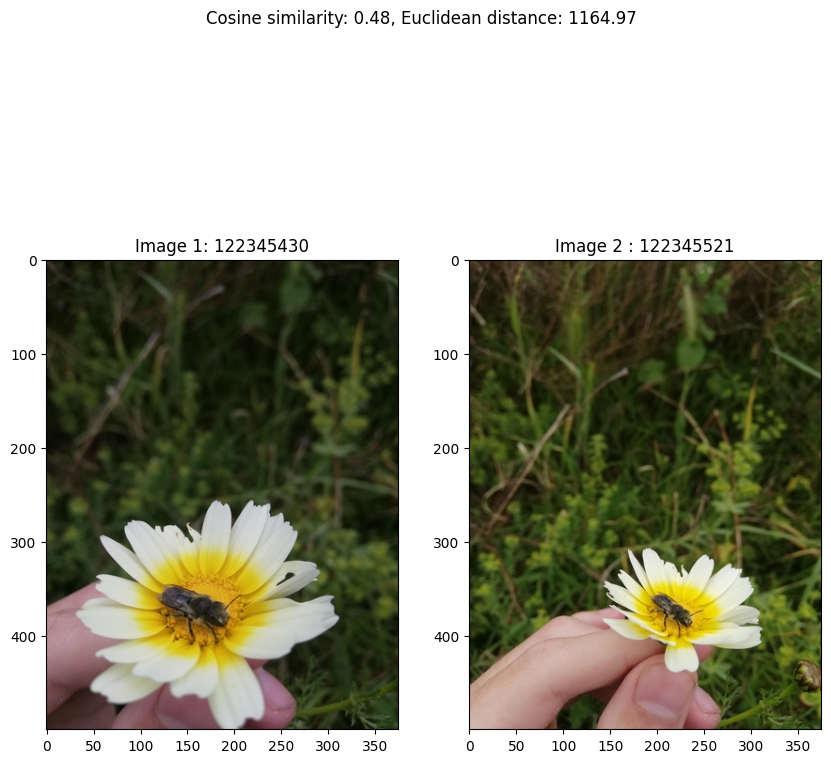

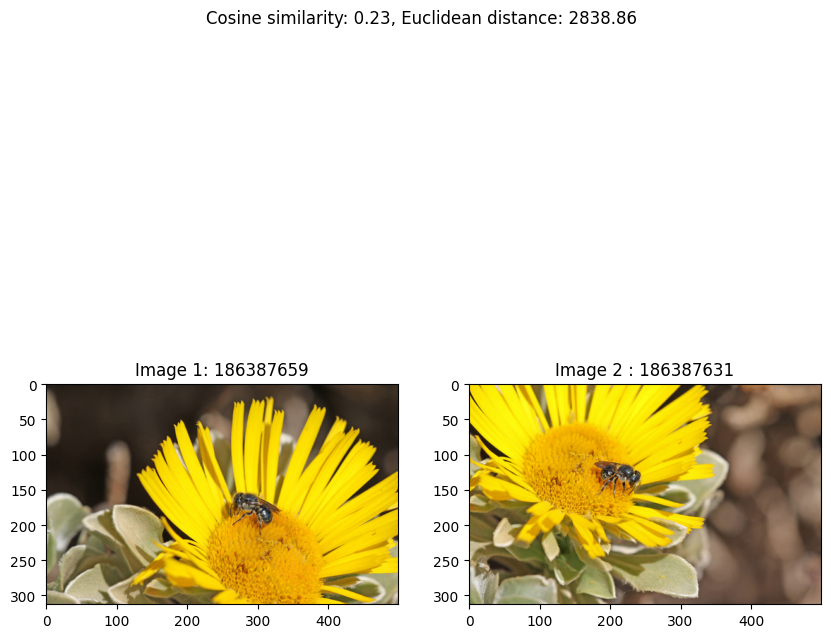

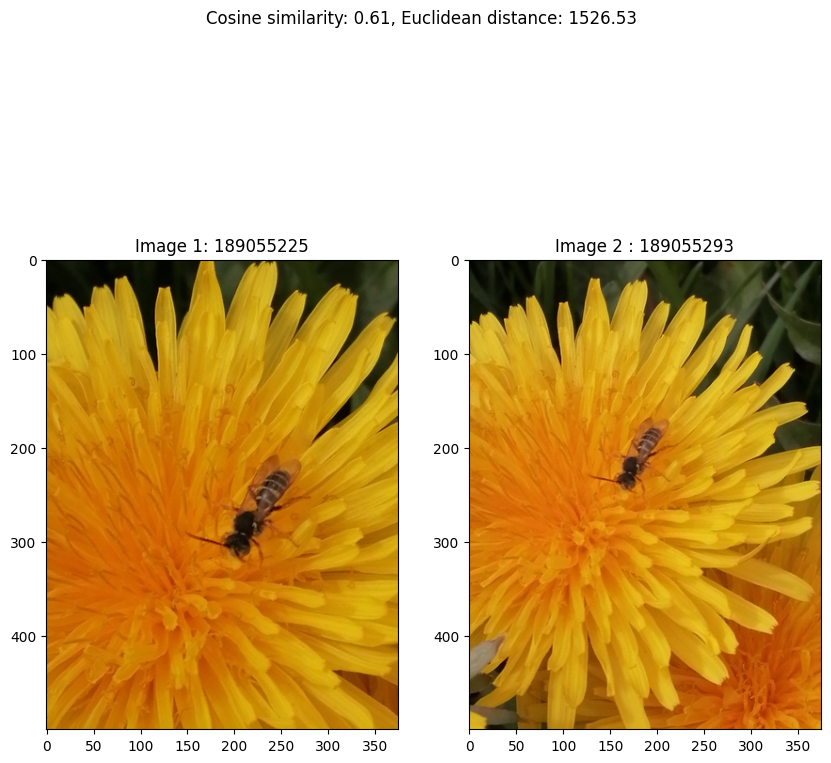

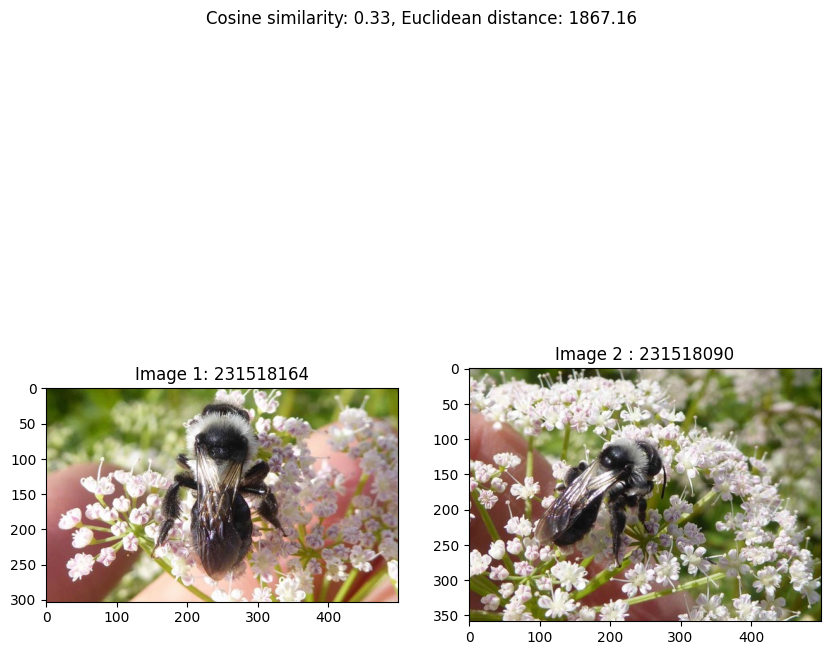

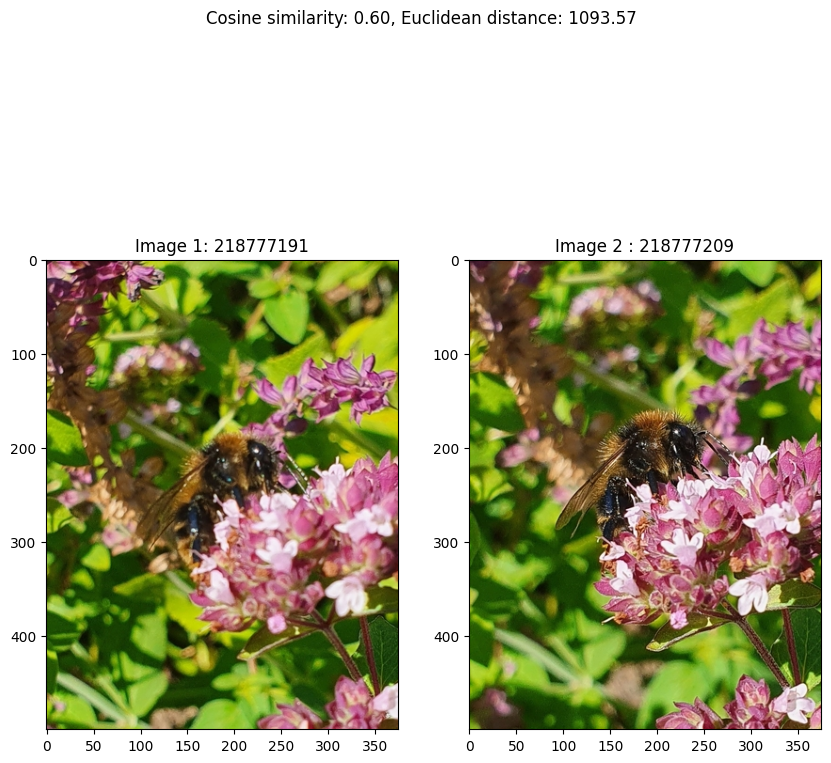

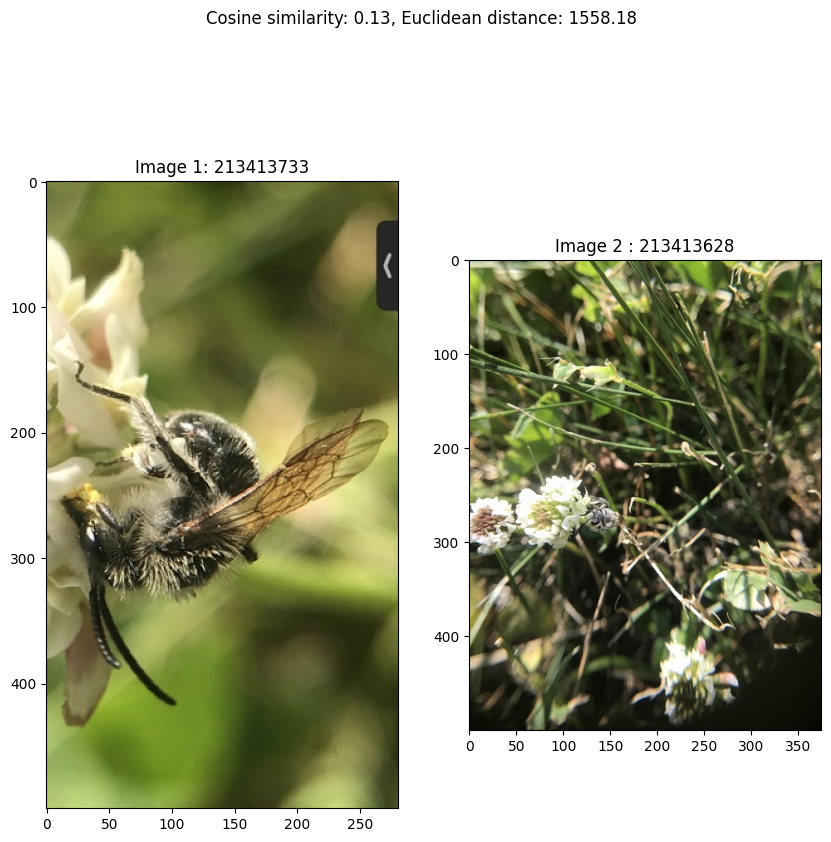

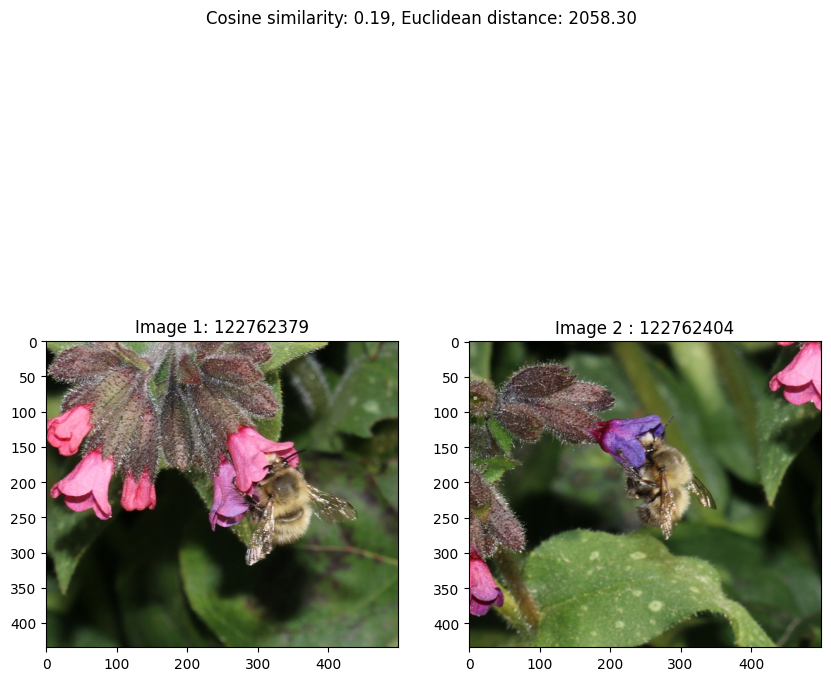

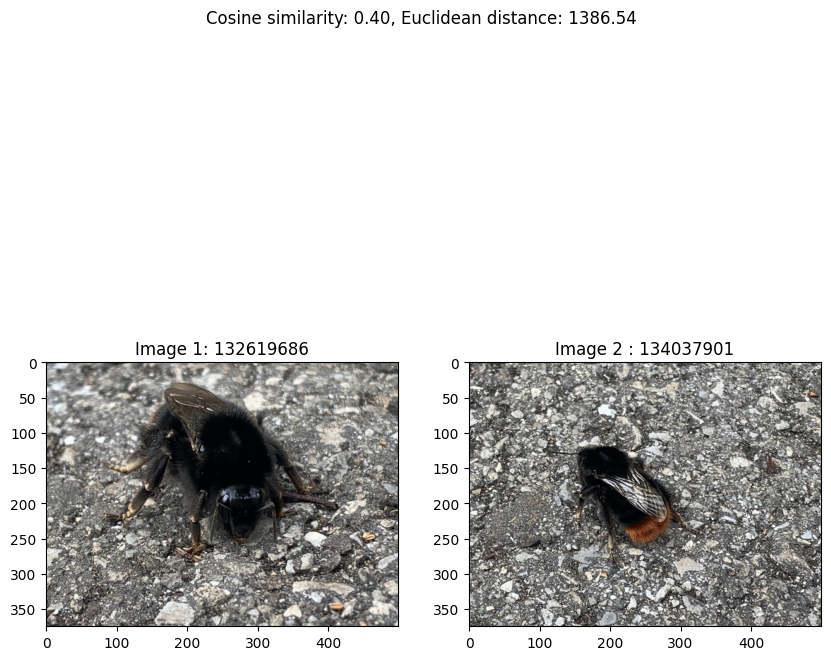

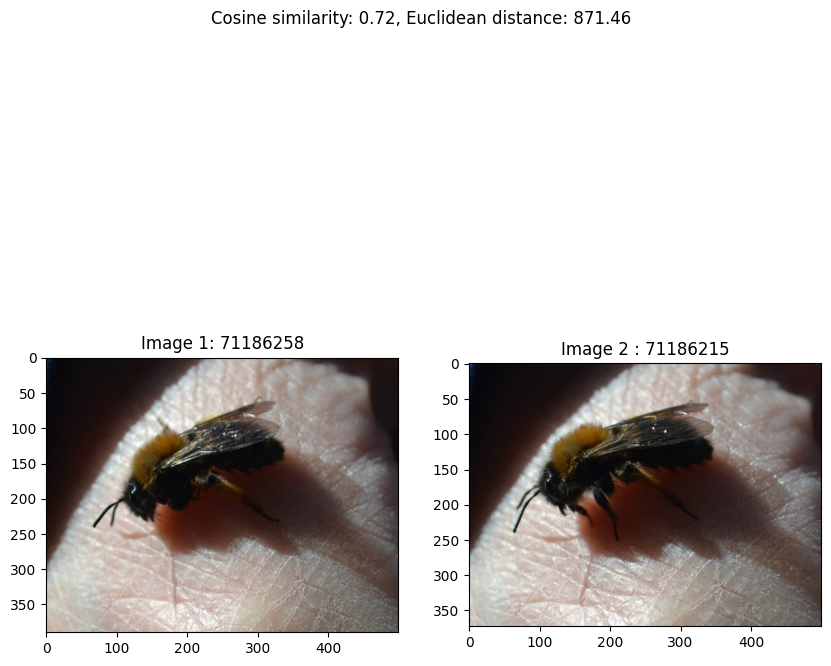

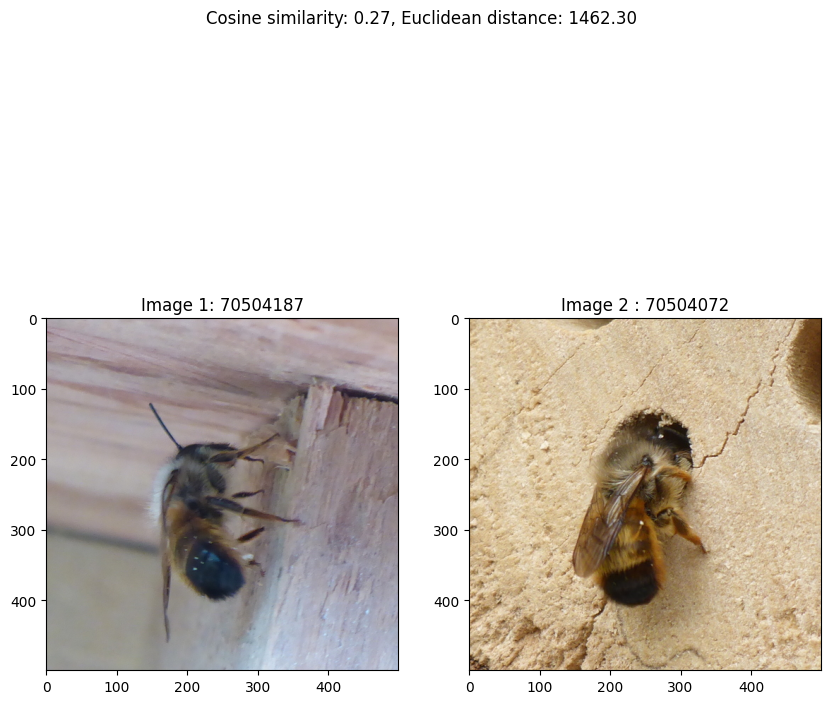

In [9]:
# iterate over the dataframe
import os
base_path = '../../data_bees_detection/whole_dataset/inaturalist_2305/'

# shuffle the dataframe
df_duplicates = df_duplicates.sample(frac=1)

counter = 0
for index, row in df_duplicates.iterrows():
    if counter < 10:
        
        img_1, img_2 = row['image_1'], row['image_2']
        label = row['genus_species']

        img_1_path , img_2_path = os.path.join(base_path,label,img_1), os.path.join(base_path,label,img_2)


        cosine_similarity, euclidean_distance = row['cosine_similarity'], row['euclidean_distance']

        save_duplicate(img_1_path,img_2_path,cosine_similarity,euclidean_distance,plot=False)

        print('Image 1: {}, Image 2: {}, Cosine similarity: {:.2f}, Euclidean distance: {:.2f}'.format(img_1_path,img_2_path,cosine_similarity, euclidean_distance))
        
        counter += 1


